In [71]:
pwd

'C:\\Users\\msrib\\Documents\\Stat Learning\\Final project'

In [72]:
import pandas as pd

In [124]:
df = pd.read_csv('Energy_consumption.csv')
display(df.shape)
display(df.head(100))
df.describe()

(1000, 11)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
95,2022-01-04 23:00:00,27.755159,39.848107,1355.385220,8,On,Off,6.843563,Wednesday,Yes,86.646922
96,2022-01-05 00:00:00,26.286906,40.706758,1384.325256,3,On,On,9.713537,Monday,Yes,75.982381
97,2022-01-05 01:00:00,20.979909,58.115629,1179.486192,9,Off,Off,8.577366,Friday,No,70.714362
98,2022-01-05 02:00:00,26.515861,58.656668,1389.698224,8,Off,Off,25.934400,Monday,No,81.745530


,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982026,45.395412,1500.052488,4.581000,15.132813,77.055873
std,2.836850,8.518905,288.418873,2.865598,8.745917,8.144112
min,20.007565,30.015975,1000.512661,0.000000,0.006642,53.263278
25%,22.645070,38.297722,1247.108548,2.000000,7.628385,71.544690
50%,24.751637,45.972116,1507.967426,5.000000,15.072296,76.943696
75%,27.418174,52.420066,1740.340165,7.000000,22.884064,82.921742
max,29.998671,59.969085,1999.982252,9.000000,29.965327,99.201120


In [125]:
print(df.dtypes)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
df = df.dropna(subset=['Timestamp'])
#Set an upper limit for valid dates
upper_limit = pd.Timestamp('2024-02-01')
lower_limit = pd.Timestamp('2021-01-01')
#Cap the dates
df['Timestamp'] = df['Timestamp'].clip(upper=upper_limit, lower=lower_limit)

min_value=df['Timestamp'].min()
max_value=df['Timestamp'].max()
print(min_value ,'to', max_value)
print(df.dtypes)

Timestamp             object
Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object
2022-01-01 00:00:00 to 2022-02-11 15:00:00
Timestamp            datetime64[ns]
Temperature                 float64
Humidity                    float64
SquareFootage               float64
Occupancy                     int64
HVACUsage                    object
LightingUsage                object
RenewableEnergy             float64
DayOfWeek                    object
Holiday                      object
EnergyConsumption           float64
dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


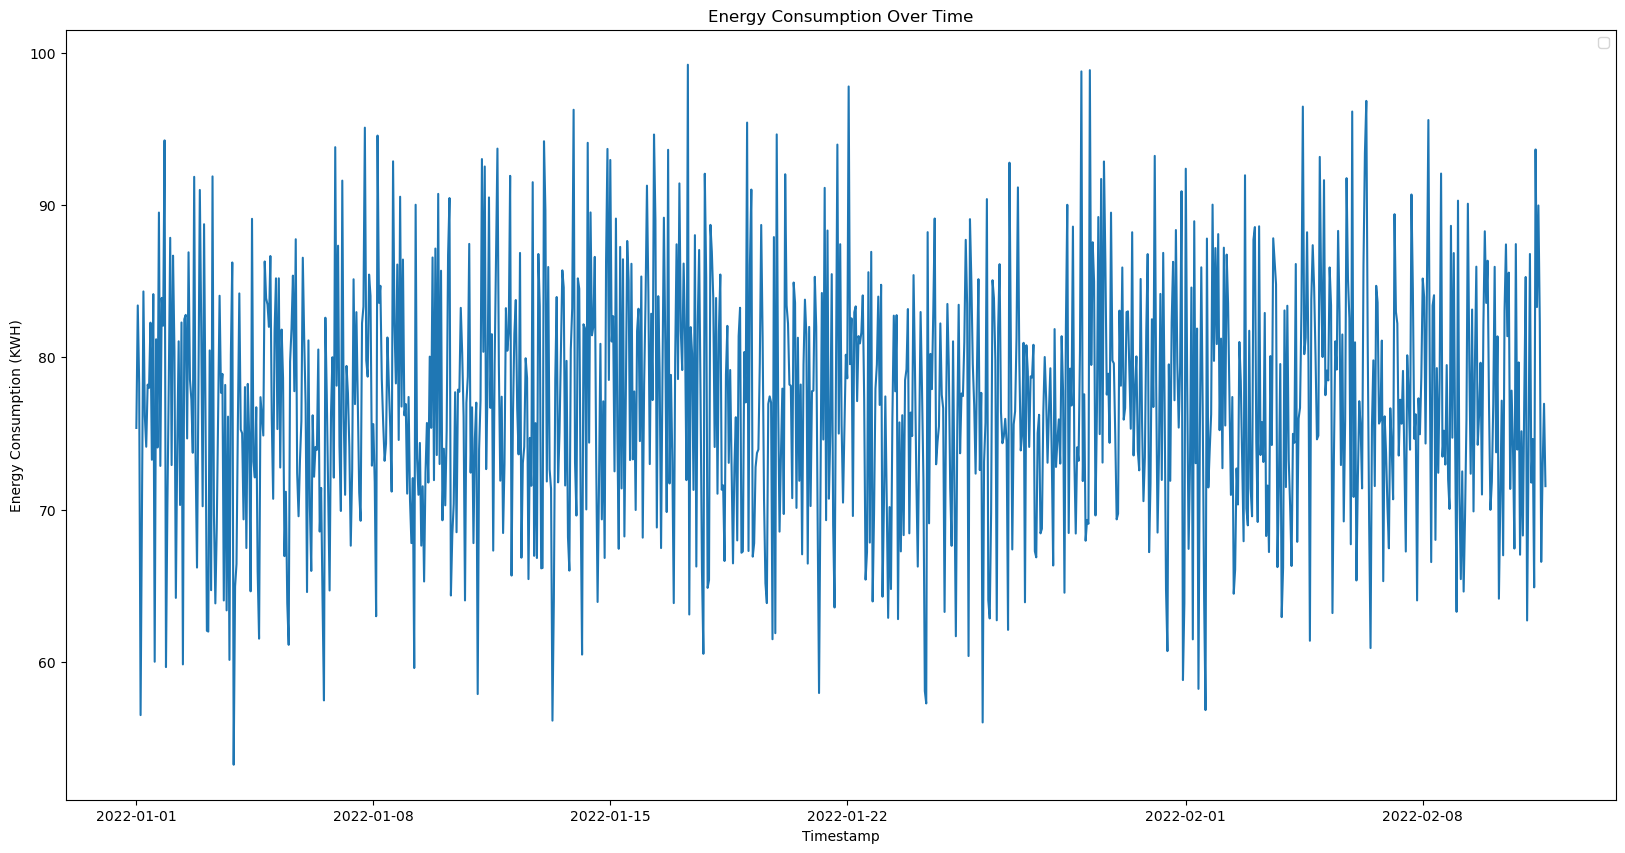

In [75]:
# Set the timestamp as the index
#df.set_index('Timestamp', inplace=True)
# Plotting function
import matplotlib.pyplot as plt
def plot_time_series(df, column, title):
    plt.figure(figsize=(20, 10))
    plt.plot(df['Timestamp'], df[column])
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Energy Consumption (KWH)')
    plt.legend()
    plt.show()
    # Plot  data
plot_time_series(df, 'EnergyConsumption', 'Energy Consumption Over Time')

Text(0, 0.5, 'Load usage')

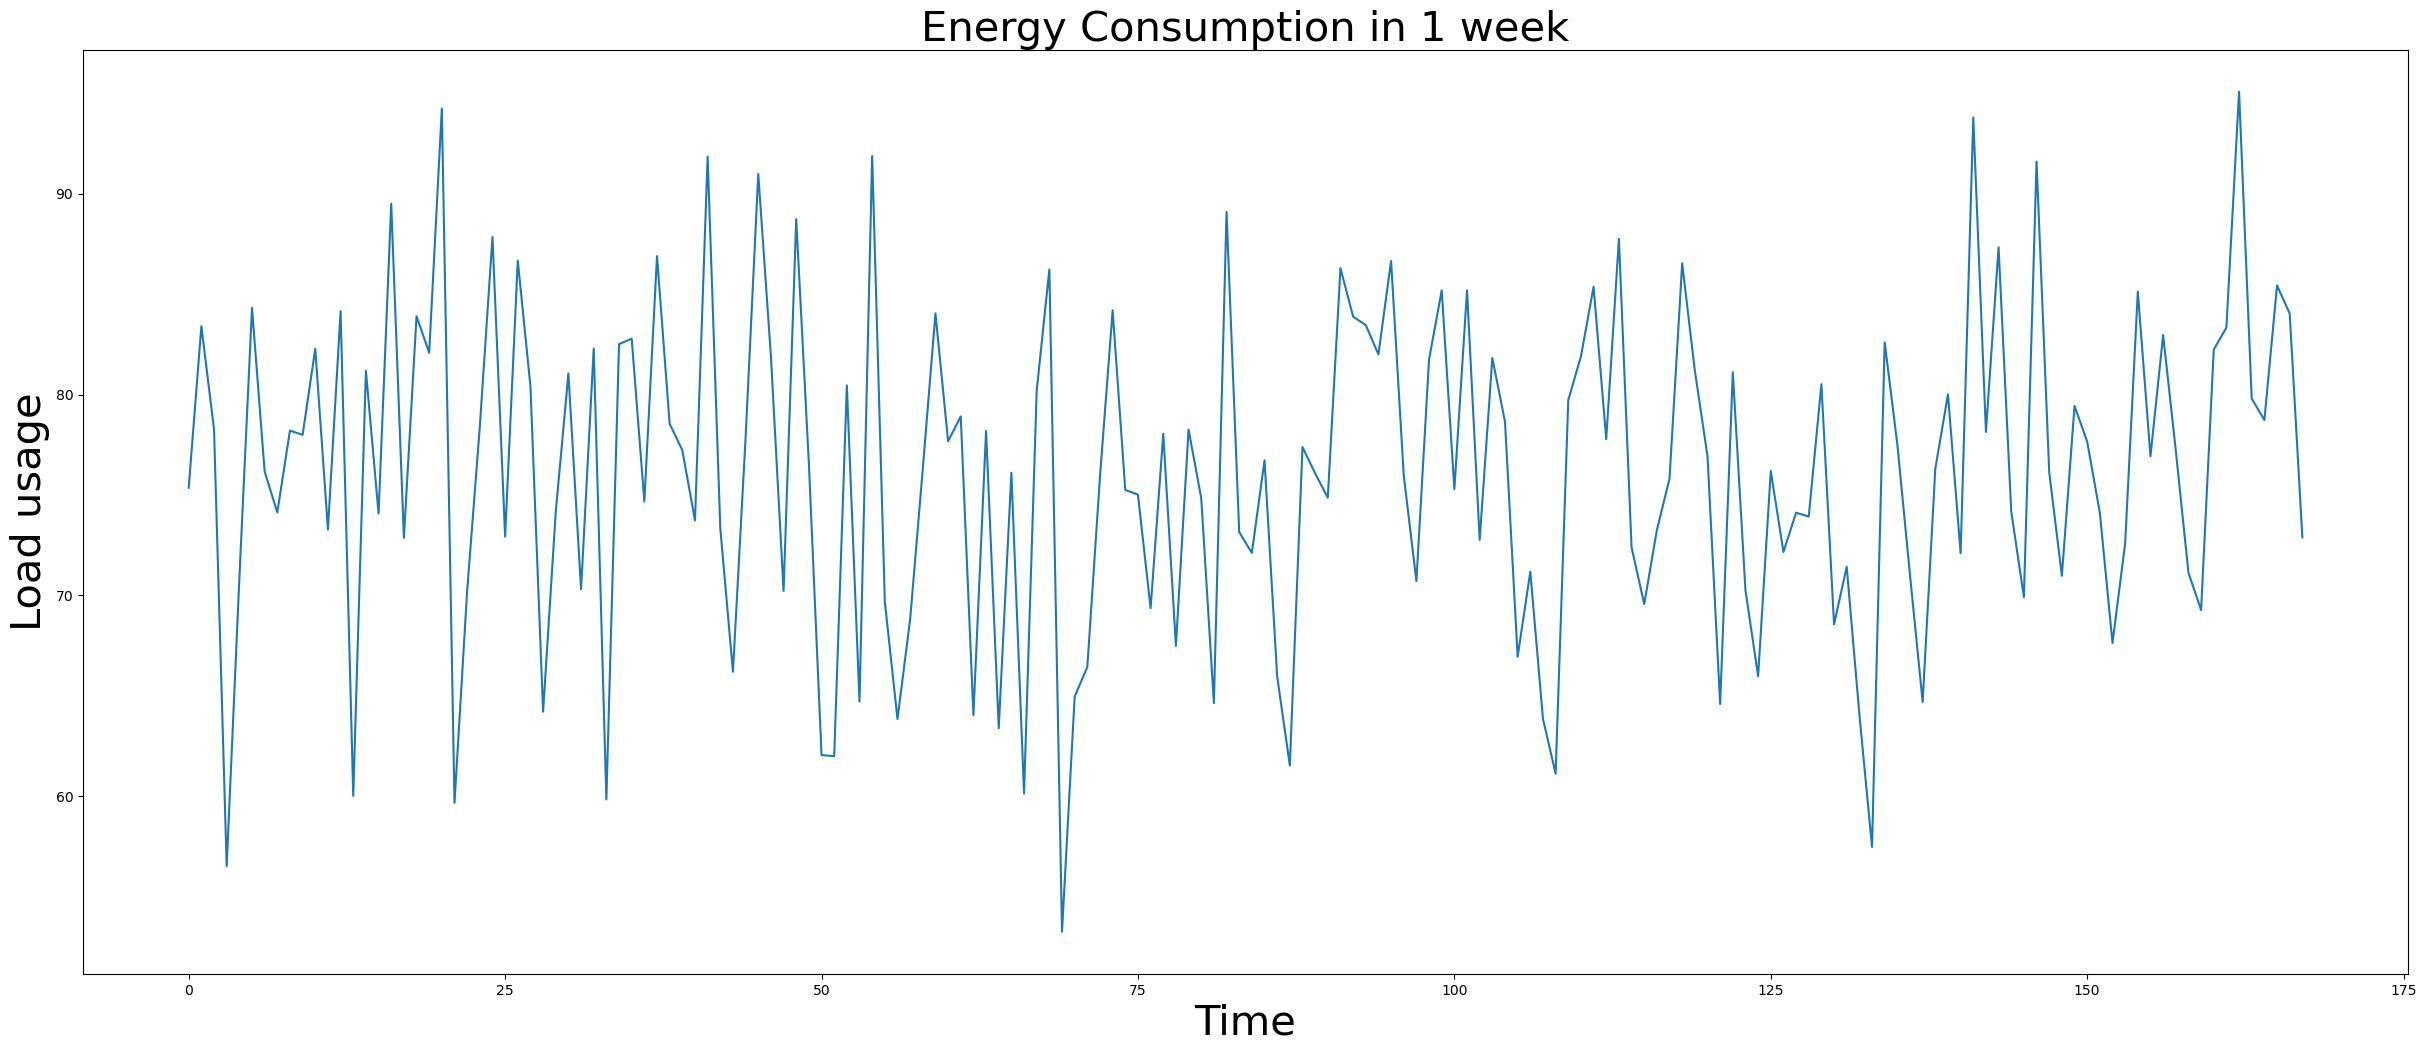

In [118]:
#Data Visualization for the energy consumption 1 week in Jan 2023
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 12))
ax.set_title("Energy Consumption in 1 week",fontsize=30)
ax.set_xlabel('Time', fontsize=30)
start=0
end=24*7
ax.plot(df['EnergyConsumption'][start:end])
ax.set_ylabel("Load usage", fontsize=30)

In [126]:
# Resample the energy consumption data weekly and sum for each week
weekly_energy = df['EnergyConsumption'].resample('W').sum()
print(weekly_energy)
#Plot the data
plt.figure(figsize=(10, 6))
colors = ['#FFB3BA', '#FFDFBA', '#FFFABA', '#BAFFC9', '#BAE1FF', '#FFD1FF', '#FFABAB']
weekly_energy.plot(kind='bar',color=colors, legend=False)
plt.title('Weekly Energy Consumption', fontsize=20)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Energy Consumption (kWh)', fontsize=14)
# Display the plot
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [142]:
continious_col=['Timestamp','Temperature','Humidity','SquareFootage' , 'RenewableEnergy']
print(continious_col)

['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'RenewableEnergy']


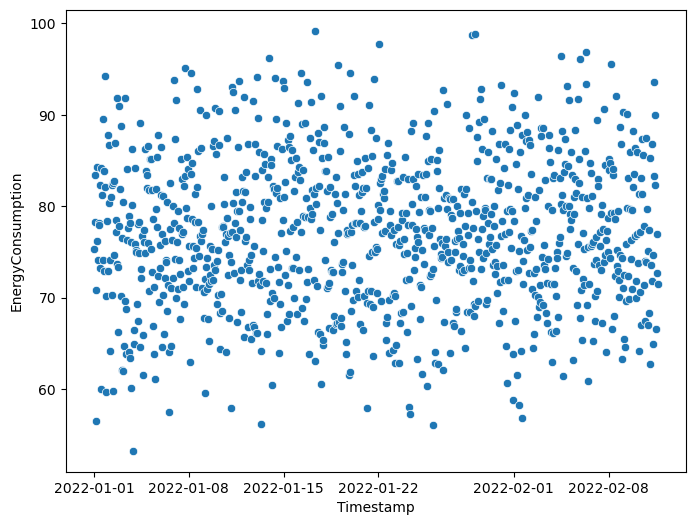

#################################################################################################################


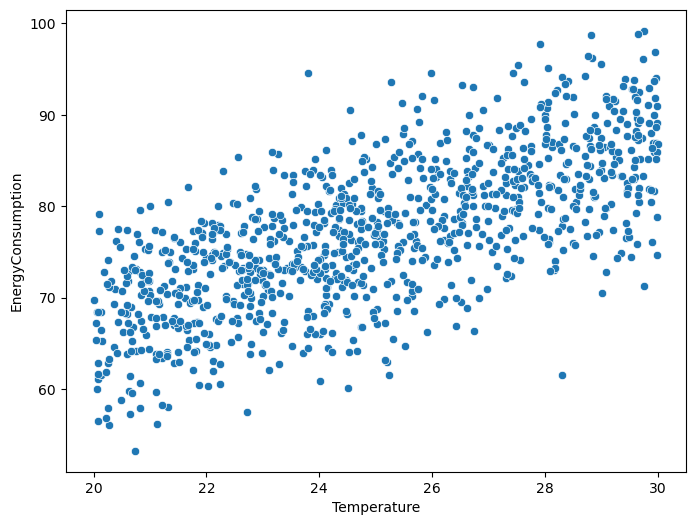

#################################################################################################################


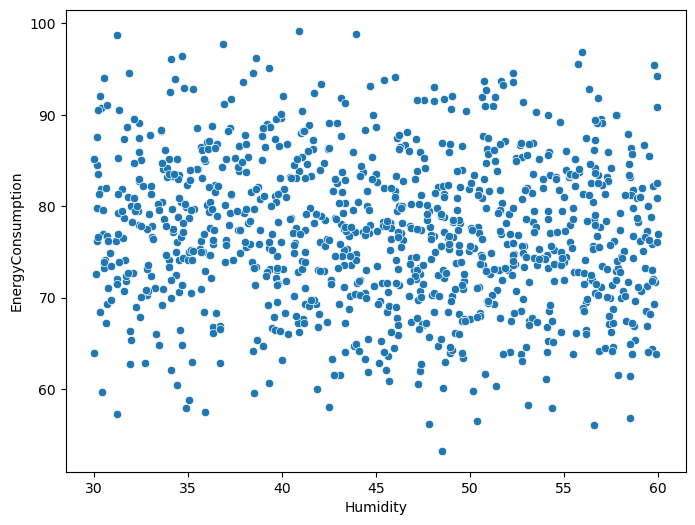

#################################################################################################################


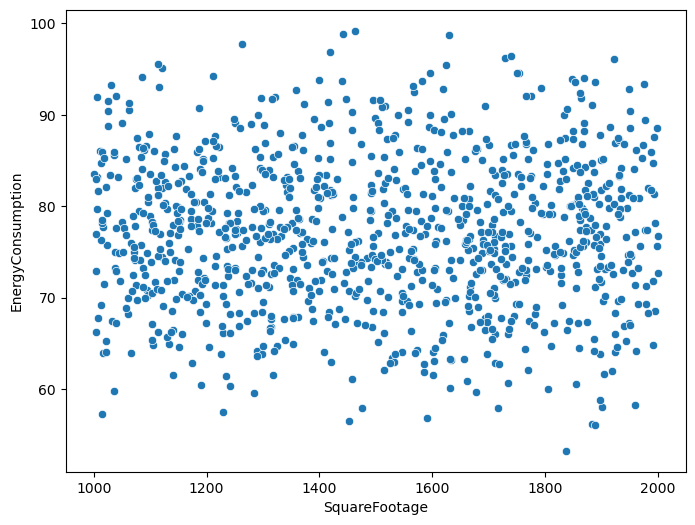

#################################################################################################################


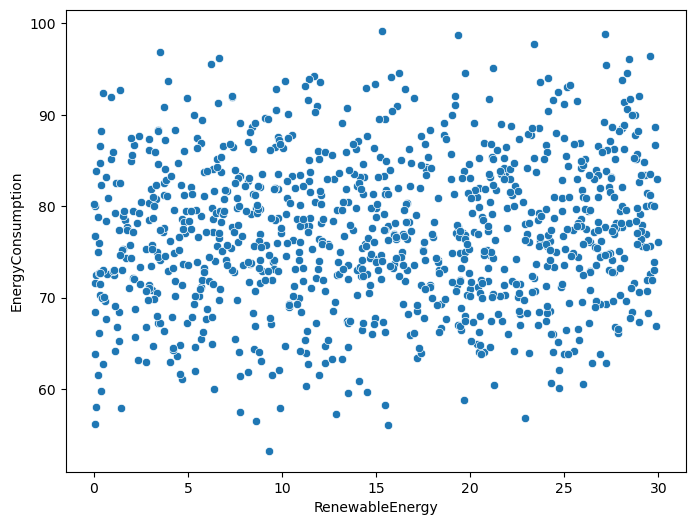

#################################################################################################################


In [144]:
import seaborn as sns
def continious_feature_ploting(dataframe, col_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=dataframe[col_name],y='EnergyConsumption', data=df)
    #sns.violinplot(x=dataframe[col_name], y='EnergyConsumption', data=df)
    #plt.xlabel(col_name)
    #plt.ylabel('Energy Consumption')
    plt.show(block=True)
    print("#################################################################################################################")
for col_name in continious_col:
    continious_feature_ploting(df,col_name)

In [82]:
#Plotting of Categorical variable
category_col= [col for col in df.columns if df[col].nunique() < 10]
print(category_col)

['HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']


In [84]:
def col_summary(dataframe, col_name):
    sns.barplot(x=dataframe[col_name],y='EnergyConsumption', data=df, hue=dataframe[col_name] ,palette='pastel')
    #plt.title('Energy Consumption by ', str(col_name))
    plt.xlabel(col_name)
    plt.ylabel('Energy Consumption')
    plt.show(block=True)

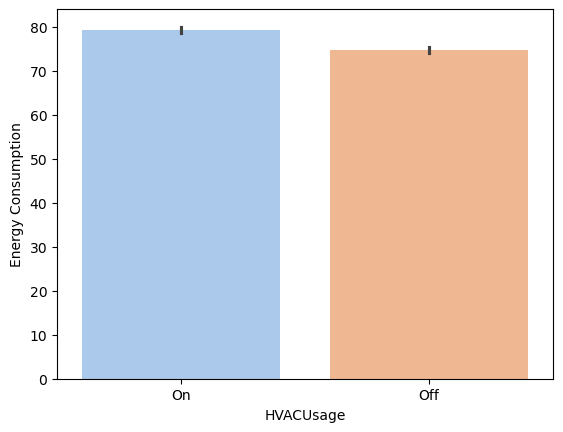

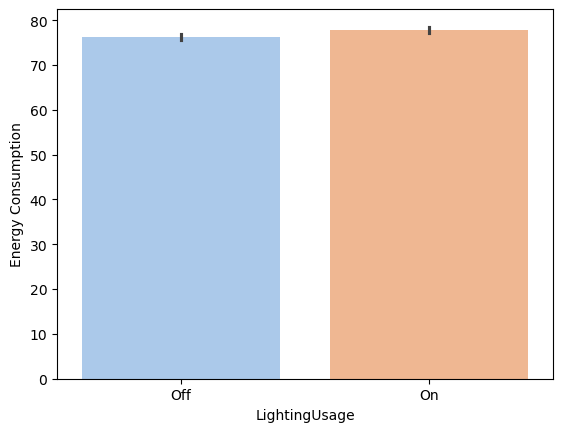

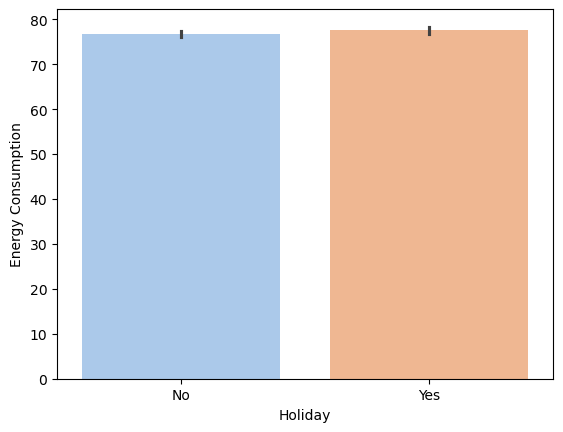

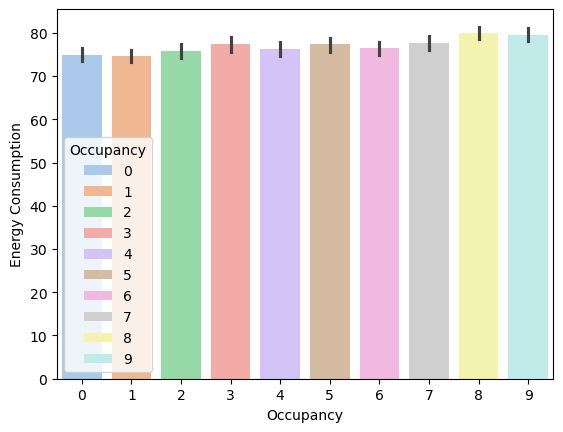

In [147]:
col_summary(df,'HVACUsage')
col_summary(df,'LightingUsage')
col_summary(df,'Holiday')
col_summary(df,'Occupancy')

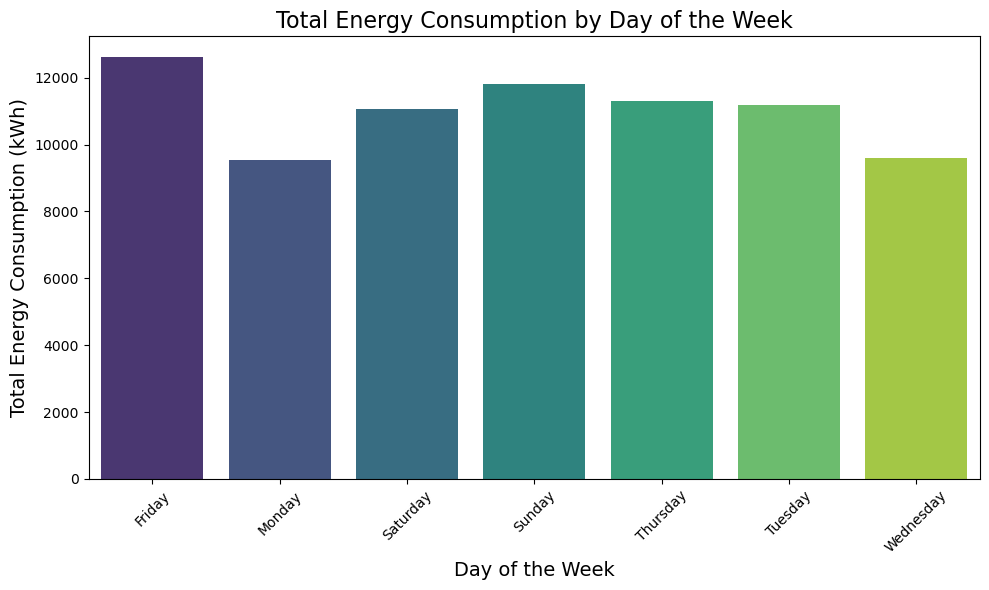

In [88]:
# Group by day of the week and sum energy consumption
daily_energy_consumption = df.groupby('DayOfWeek', as_index=False)['EnergyConsumption'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='EnergyConsumption', data=daily_energy_consumption, hue='DayOfWeek', palette='viridis')
plt.title('Total Energy Consumption by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Energy Consumption (kWh)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

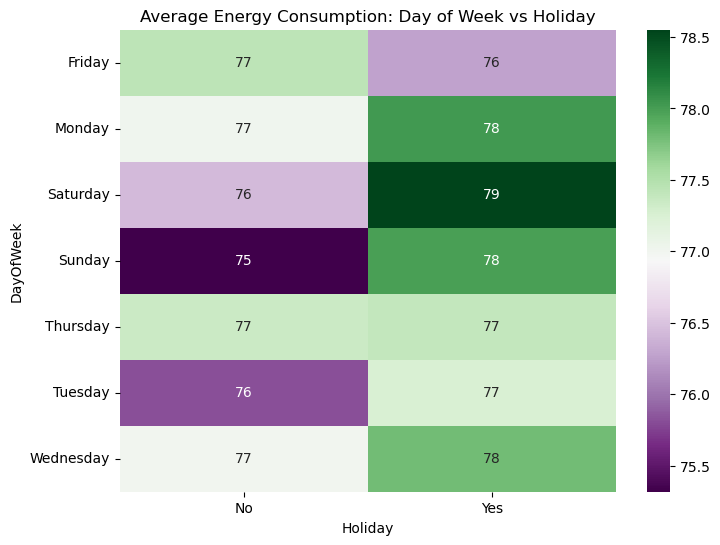

In [141]:
# Create a pivot table of Energy Consumption by Day of Week and Holiday
pivot_table = df.pivot_table(values='EnergyConsumption', index='DayOfWeek', columns='Holiday', aggfunc='mean')

# Create a heatmap for categorical data
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='PRGn')
plt.title('Average Energy Consumption: Day of Week vs Holiday')
plt.show()


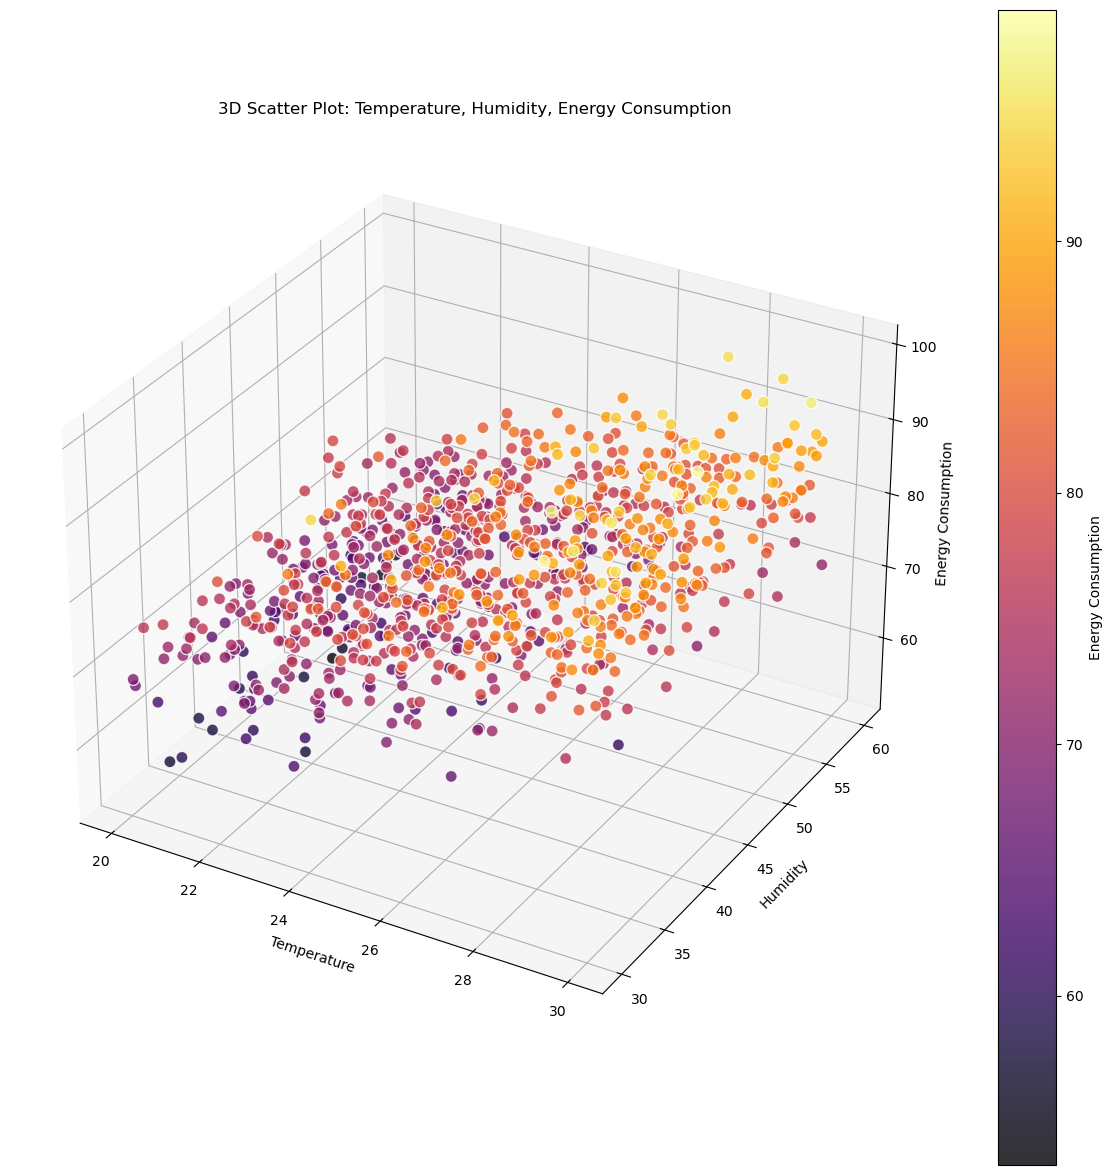

In [132]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for 3 variables
scatter= ax.scatter(df['Temperature'], df['Humidity'], df['EnergyConsumption'], c=df['EnergyConsumption'],  
                      cmap='inferno',
                      s=75, alpha=0.8, edgecolors='w')
# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Energy Consumption')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Energy Consumption')

plt.title('3D Scatter Plot: Temperature, Humidity, Energy Consumption')
plt.show()

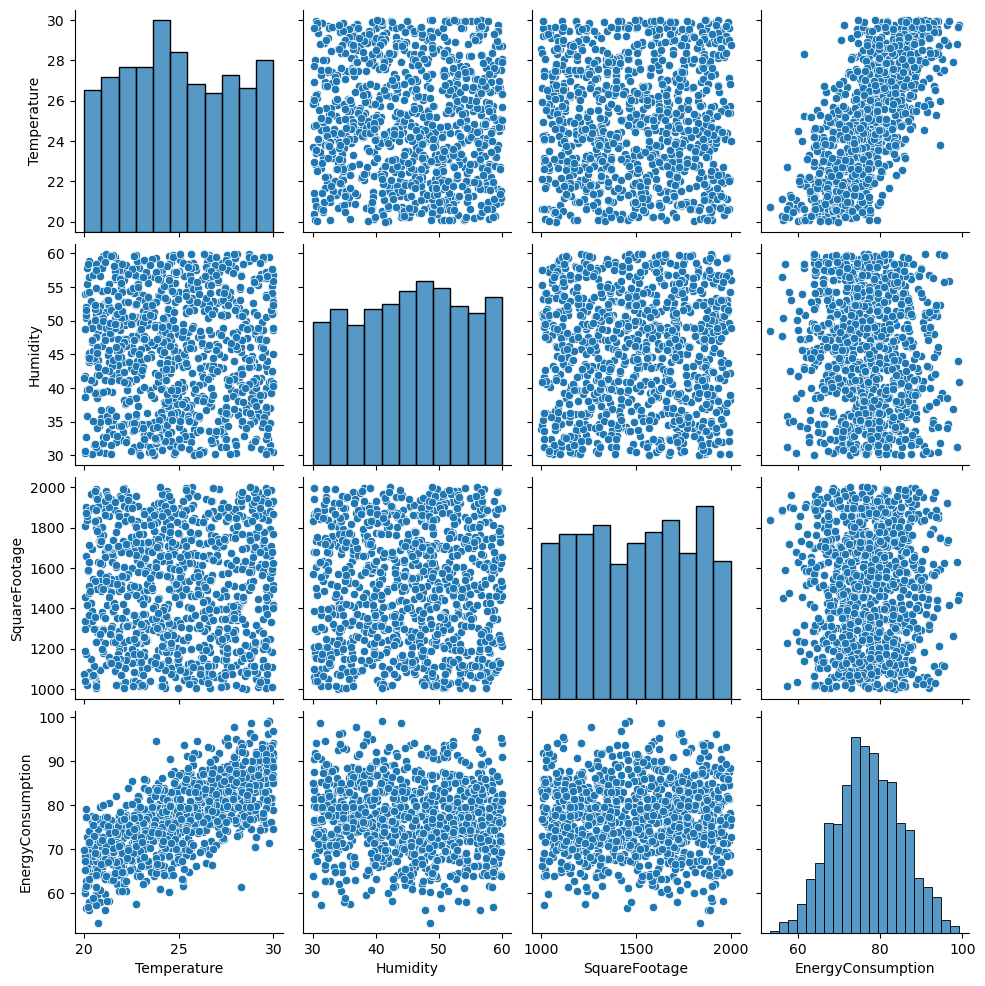

In [150]:
# Pairplot
sns.pairplot(df[['Temperature', 'Humidity', 'SquareFootage', 'EnergyConsumption']])
plt.show()

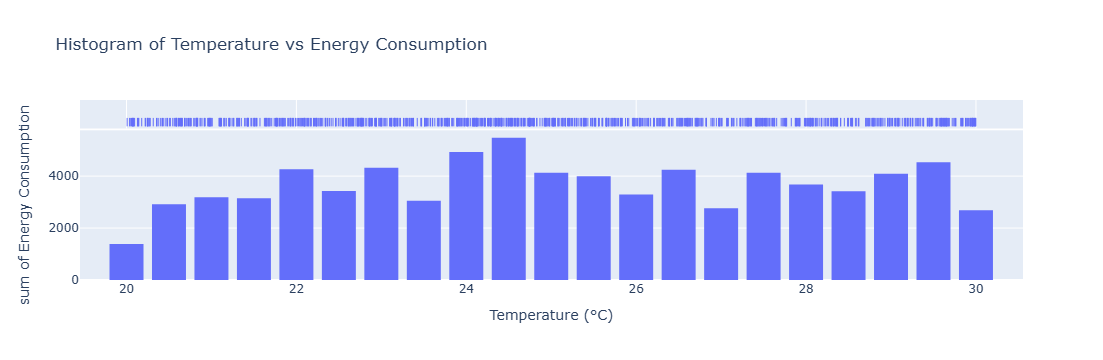

In [161]:
import plotly.express as px
# Create a histogram plot to visualize the relationship between Temperature and EnergyConsumption
fig = px.histogram(df, x="Temperature", y="EnergyConsumption", marginal="rug",
                   hover_data=df.columns,
                   title='Histogram of Temperature vs Energy Consumption',
                   labels={'Temperature': 'Temperature (°C)', 'EnergyConsumption': 'Energy Consumption'})
fig.update_layout(bargap=0.2)  # Gap between bars

# Show plot
fig.show()

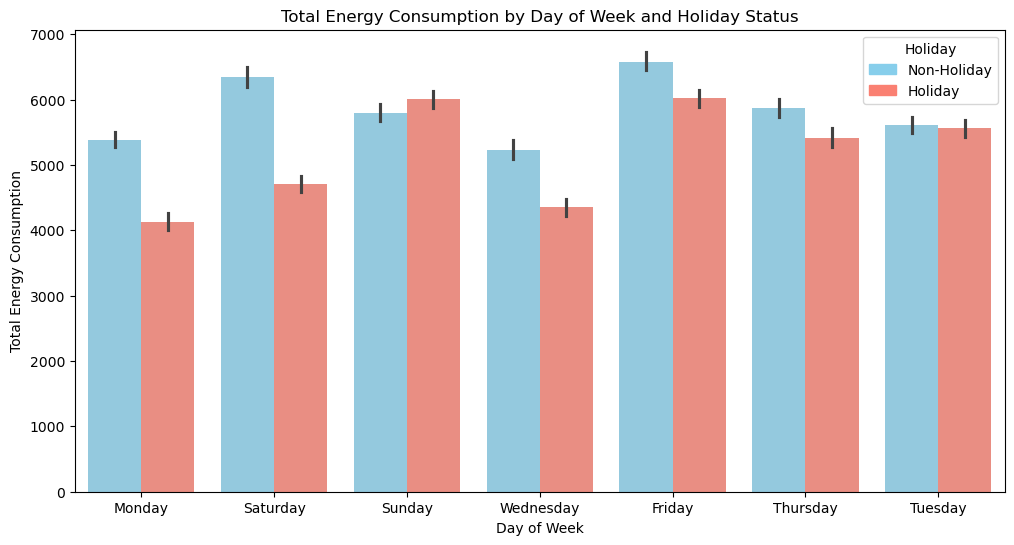

In [197]:
df = pd.read_csv('Energy_consumption.csv')
from matplotlib.patches import Patch
plt.figure(figsize=(12, 6))
#df['Holiday'] = df['Holiday'].astype(str)
#print(df['Holiday'] )
# Custom color palette for 'No' and 'Yes'
Palette = {'No': 'skyblue', 'Yes': 'salmon'}
sns.barplot(x='DayOfWeek', y='EnergyConsumption', hue='Holiday', data=df, estimator=sum, palette=Palette)
plt.title('Total Energy Consumption by Day of Week and Holiday Status')
plt.xlabel('Day of Week')
plt.ylabel('Total Energy Consumption')
#plt.legend(title='Holiday', labels=['No', 'Yes'])
# Customize the legend with custom colors
legend_labels = ['Non-Holiday', 'Holiday']
legend_colors = ['skyblue', 'salmon']
handles = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, title='Holiday', loc='upper right')
plt.show()